# **Bank Loan Prediction**



## **Content:**
This case is about a bank which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers. 

## **Data Description**
### **Format:**
* **ID**- Customer ID 
* **Age**- Customer's age in completed years 
* **Experience**- Number of years of professional experience 
* **Income**- Annual income of the customer (in dollars)
* **ZIPCode**- Home Address ZIP code. 
* **Family**- Family size of the customer 
* **CCAvg**- Avg. spending on credit cards per month. (in dollars)
* **Education**- Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional 
* **Mortgage**- Value of house mortgage if any. ($000) 
* **Personal Loan**- Did this customer accept the personal loan offered in the last campaign? 
* **Securities Account**- Does the customer have a securities account with the bank? 
* **CD Account**- Does the customer have a certificate of deposit (CD) account with the bank? 
* **Online**- Does the customer use internet banking facilities? 
* **CreditCard**- Does the customer uses a credit card issued by Bank? 

## **Objective:**
Tools Recommended- R, Python. 
1. Build a model that will help to identify the potential customers who have a higher probability of purchasing the loan.
2. Use a classification model to predict the likelihood of a liability customer buying personal loans. 
3. Build a decision tree model to identify probability of purchasing loan. 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **1. Load the  required libraries and also load the training dataset.**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
data = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/Uptricks Intern/Task 2/train.xlsx',sheet_name=1,header=[0],index_col=None)
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## **2. Data Understanding**

**Continous Variables**
* Age
* Experience
* Income
* CCAvg
* Mortagage

**Categorical Variables**
* Id
* Zip Code
* Family
* Education
* Personal Loan (**Target Variable**)
* Securities Account
* CD Acount
* Online
* CreditCard

**Since the target variable is having categorical values. Therefore it is a Classification Problem.**

In [ ]:
# Get dimensions of the data
data.shape

(5000, 14)

In [ ]:
# Information about the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observation:**
* There are 13 feauture which contains integer values and 1 feature contain float type values.
* None of the features are of objects data type.
* There are total of 5000 rows and of 14 columns in the dataset.

In [ ]:
# Applying statistics for the gaining some basic statistical information from the data.
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


After gaining statistical infomation from the data now we check for the missing values if there is any present in the data.<br>
**So let's check for the missing values.**

In [ ]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Observation:**
* None of the features conatins any missing values.

## **Exploratory Data Analysis**

## **Univariate Analysis** - Categorical Feautures

Now let's find the Unique values of all the categorical features have a starting with the targeted variable.

In [ ]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

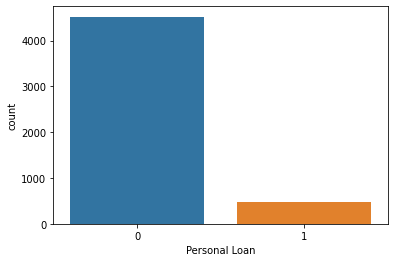

In [ ]:
import seaborn as sns
sns.countplot(x = 'Personal Loan', data = data)

**Observation:**
* Personal Loans feature consist of two values 0 and 1. Here 0 indicates that customer did accept the personal loan while 1 indicates that it accept the personal loan.
* It is very clear from the above plot that most of the customer does not accept the personal loan.

**Inference:**
Since most of the customer does not accept the personal. The ratio of does not accept to accept personal loans is approx 9:1.
Therefore it is example of imbalanced dataset.
* Later on we have to handle this imbalanced data set using different techiniques so as to improve the performance of the model.


In [ ]:
data['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

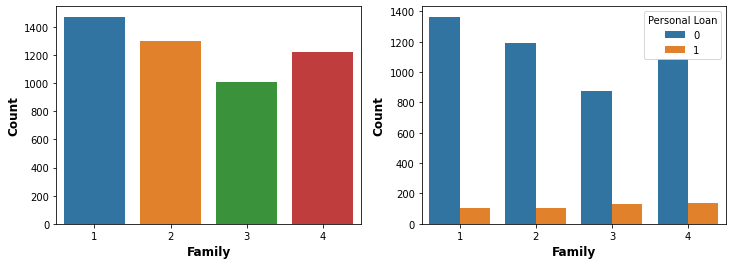

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(x = 'Family', data = data)
plt.xlabel('Family', fontsize =12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12 , fontweight ='bold')

plt.subplot(122)
sns.countplot(x = 'Family', hue= 'Personal Loan',data = data)
plt.xlabel('Family', fontsize =12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12 , fontweight ='bold')
plt.show()

**Observation:**
* Family feature consist of 4 values 1,2,3,4 where each values descibe the number of members in a family. for ex- 2 shows family has 2 members.
* Customers who have family size 1 are more while with family size 3 are less. Ita also seems to equally distributed graph.
* If we comapre customers who accept loans then customers with family size 4 are more and customer who has family size 1 are less who accepts the personal loan.

**Inference:**
* It some how shows that customers who accept loans are dependent on family size.

In [ ]:
data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

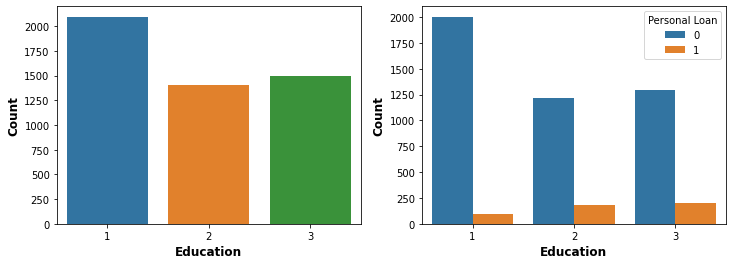

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(x = 'Education', data = data)
plt.xlabel('Education', fontsize =12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12 , fontweight ='bold')

plt.subplot(122)
sns.countplot(x = 'Education', hue= 'Personal Loan',data = data)
plt.xlabel('Education', fontsize =12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12 , fontweight ='bold')
plt.show()

**Observation:**
* Education feature consist of 3 values where each value shows the education level in such a way that 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
* Most of the customers are Undergraduate and minimum nuber of customers are Graduate.
* In we compare who accept the personal loans based on Education then Advanced/Professional and Graduate customers are more likely to accept the Personal loan.

**Inference:**
* Education is an ordinal varaible i.e the order matters.
* It somehow shows that customers who accepts the Personal loans are dependent on Education.

In [ ]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

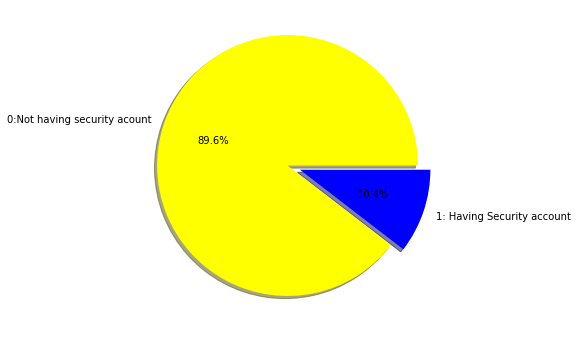

In [ ]:
plt.figure(figsize=(8,6))
sizes = [4478, 522]
labels = ['0:Not having security acount','1: Having Security account']
colors = ['yellow', 'blue']
explode = [0.1,0]
plt.pie(sizes,labels= labels,colors= colors,explode = explode, autopct = '%1.1f%%',shadow = True)
plt.show()

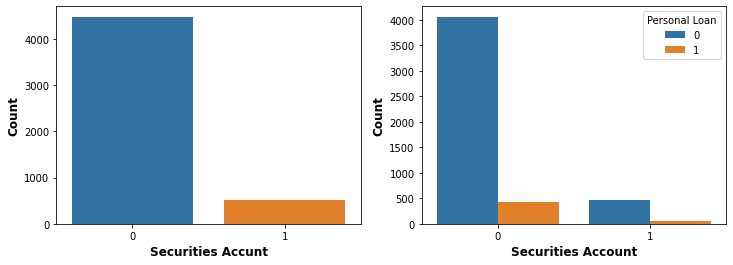

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(x = 'Securities Account', data = data)
plt.xlabel('Securities Accunt', fontsize =12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12 , fontweight ='bold')

plt.subplot(122)
sns.countplot(x = 'Securities Account', hue= 'Personal Loan',data = data)
plt.xlabel('Securities Account', fontsize =12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12 , fontweight ='bold')
plt.show()

**Observation:**
* Securities Account features consists of 2 values 0 and 1 where '0' indicates the customer does not have security account with the bank and '1' indicates that the customers have the security account with the bank.
* Most of the customers does not have security acounts
* As we can see from above graph that 89.6% customers does not have an security account.
* In we compare who accept the personal loans based on Securities account then the person who does not have securities account are more likely to accept the Personal loan.

In [ ]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

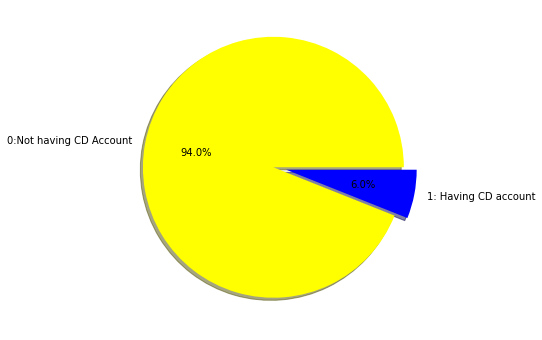

In [ ]:
plt.figure(figsize=(8,6))
sizes = [4698, 302]
labels = ['0:Not having CD Account','1: Having CD account']
colors = ['yellow', 'blue']
explode = [0.1,0]
plt.pie(sizes,labels= labels,colors= colors,explode = explode, autopct = '%1.1f%%',shadow = True)
plt.show()

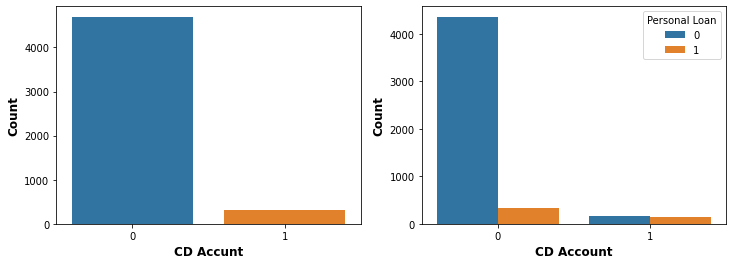

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(x = 'CD Account', data = data)
plt.xlabel('CD Accunt', fontsize =12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12 , fontweight ='bold')

plt.subplot(122)
sns.countplot(x = 'CD Account', hue= 'Personal Loan',data = data)
plt.xlabel('CD Account', fontsize =12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12 , fontweight ='bold')
plt.show()

**Observation:**
* CD Account features consists of 2 values 0 and 1 where '0' indicates the customer does not have certificate of deposit(CD) account with the bank and '1' indicates that the customers have the certificate of deposit(CD) account with the bank.
* Most of the customers does not have CD accounts.
* As we can see from above graph that 94% customers does not have an CD account.
* Only few of the customers are accepting personal loans who does not having CD account while customers who has CD Account are almost all likely to accept the personal loans.



In [ ]:
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

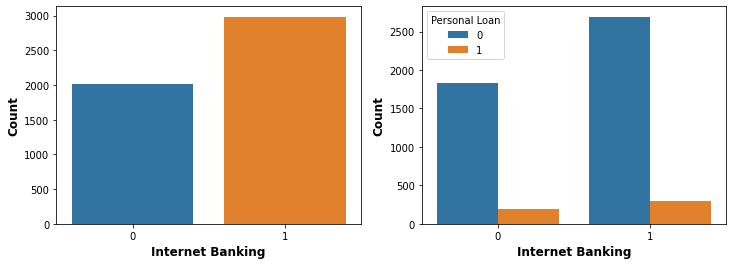

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(x = 'Online', data = data)
plt.xlabel('Internet Banking', fontsize =12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12 , fontweight ='bold')

plt.subplot(122)
sns.countplot(x = 'Online', hue= 'Personal Loan',data = data)
plt.xlabel('Internet Banking', fontsize =12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12 , fontweight ='bold')
plt.show()

**Observations:**
* Online feature consist of 2 values 0 and 1, where '0' indicates that the customers using Internet Banking facility while '1' indicates the customers does not using Internet Banking facility
* Number of customers using Internet Banking are more than the customers who does not using Internet Banking facility.
* Customers who does not using Internet Banking facility are not likey to accept Personal loans as comapared to who use Internet Banking facility.

In [ ]:
print(data['CreditCard'].value_counts(),'\n')
print('Count customers based on credit card whose Personal Loan is 0')
print(data[data['Personal Loan'] == 0]['CreditCard'].value_counts(),'\n')
print('Count customers based on credit card whose Personal Loan is 1')
print(data[data['Personal Loan'] == 1]['CreditCard'].value_counts())

0    3530
1    1470
Name: CreditCard, dtype: int64 

Count customers based on credit card whose Personal Loan is 0
0    3193
1    1327
Name: CreditCard, dtype: int64 

Count customers based on credit card whose Personal Loan is 1
0    337
1    143
Name: CreditCard, dtype: int64


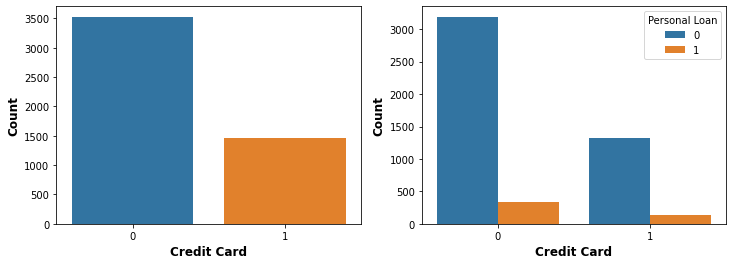

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(x = 'CreditCard', data = data)
plt.xlabel('Credit Card', fontsize =12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12 , fontweight ='bold')

plt.subplot(122)
sns.countplot(x = 'CreditCard', hue= 'Personal Loan',data = data)
plt.xlabel('Credit Card', fontsize =12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12 , fontweight ='bold')
plt.show()

**Observations:**
* CreditCard consist of 2 values 0 and 1, where '0' indicates that the customrs does not using CreditCard issued by bank while '1' indicates the customers does ues Credit card issued by bank.
* Number of customers who uses credit card issued by bank are 1,470 while who does not use credit card are 3,530.
* Customers who does not use cerdit card are more likely to accept personal loans as comapred to who uses.
* If we comapre the ratio of customers who accept personal loans between using credit card and not using credit we found equal amount i.e 10.7%

## **Univariate Analysis** - Numerical Feautures

* **In which age group the maximum number of customers falls?**

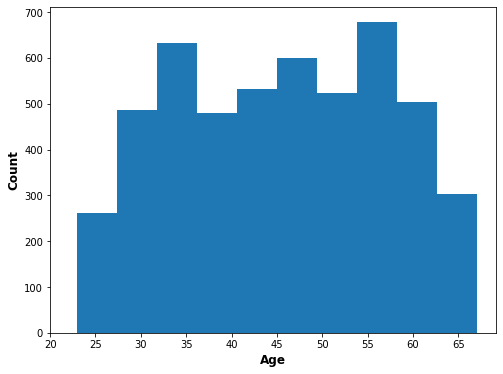

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(data['Age'],bins = None)
plt.xticks(np.arange(20,70,5))
plt.xlabel('Age', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold')
plt.show()

**Observation:**
* The age group of the customer are normally distributed.
* Most of the customer lies in the age group of 30 - 60
* Maximum number of customers lies in the age group 55-60 somewhere around 700 and 30 - 35 where number of customers are around 650.

* **How many years of experience the most of the customers has?**

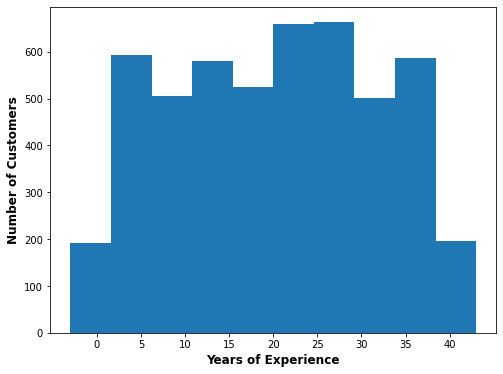

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(data['Experience'])
plt.xticks(np.arange(0,45,5))
plt.xlabel('Years of Experience', fontsize = 12, fontweight = 'bold')
plt.ylabel('Number of Customers', fontsize = 12, fontweight = 'bold')
plt.show()

**Observation:**
* The range of the years of Experience the customers has is 0-45.
* Maximum number of customers has a experience of 20-35 years.
* The customersExperience graph is normally distributed.

* **In what range the CCAvg lies for the maximum number of customers.**

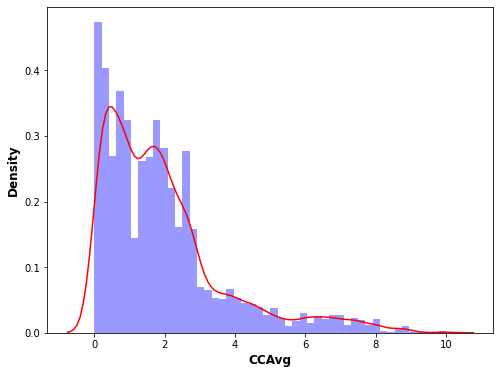

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(data['CCAvg'],hist = True, kde=True, hist_kws = {'color':'blue'},kde_kws={'color':'red'})
plt.xlabel('CCAvg',fontsize = 12,fontweight = 'bold')
plt.ylabel('Density',fontsize = 12,fontweight = 'bold')
plt.show()


**Observation:**
* The range of CCAvg for all the customers is 0-10(in dollars)
* Maximum number of customers has a CCAvg of somewhere around 0-2(in dollars).
* The CCAvg graph is right skewed distribution.

* **Is 0 dollar is a most frequent mortage value for customers? If yes, then how how many customers have this value.**



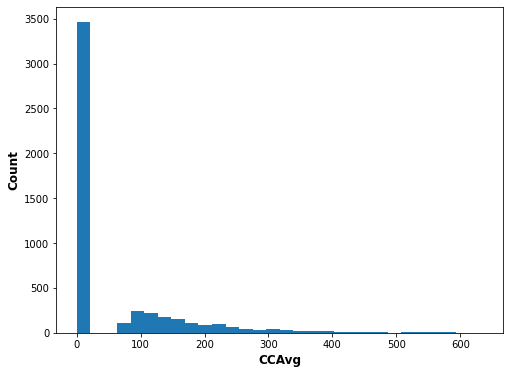

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(data['Mortgage'],bins = 30)
#sns.distplot(data['Mortgage'],hist = True, kde=True, hist_kws = {'color':'blue'},kde_kws={'color':'red'})
plt.xlabel('CCAvg',fontsize = 12,fontweight = 'bold')
plt.ylabel('Count',fontsize = 12,fontweight = 'bold')
plt.show()


Observation:
* Around 3,500 customers have mortgage value 0.

### **Income Distribution**

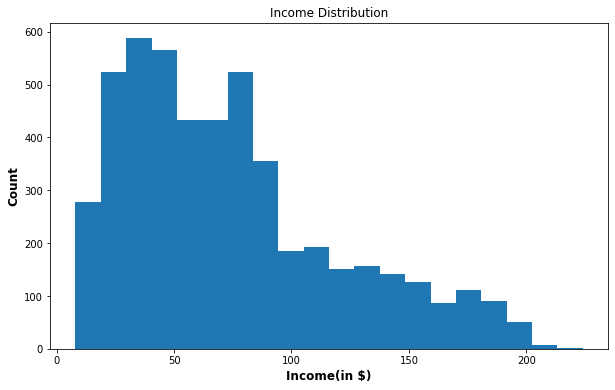

In [ ]:
plt.figure(figsize=(10,6))

# plotting Income distribution for all customers.
plt.hist(data['Income'],bins = 20)
#plt.xticks(np.arange(0,250,25))
plt.xlabel('Income(in $)', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold')
plt.title('Income Distribution')
plt.show()

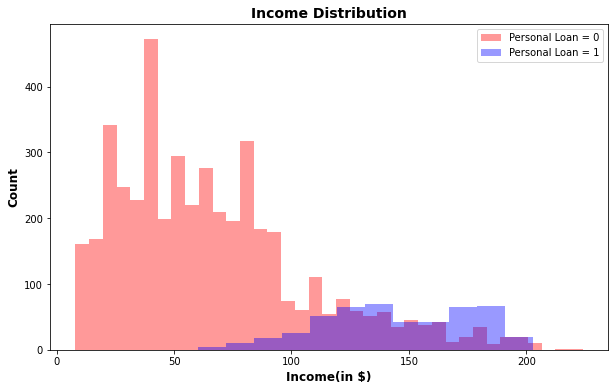

In [ ]:
# Plotting Income distribution for customers based on personal loans.
plt.figure(figsize=(10,6))
sns.distplot(data[data['Personal Loan']==0]['Income'], hist = True, kde = False, color='red', label = 'Personal Loan = 0')
sns.distplot(data[data['Personal Loan']==1]['Income'], hist = True, kde = False, color='blue', label = 'Personal Loan = 1')
plt.legend()
plt.xlabel('Income(in $)',fontsize = 12, fontweight = 'bold' )
plt.ylabel('Count', fontsize = 12, fontweight = 'bold')
plt.title('Income Distribution',fontsize = 14, fontweight = 'bold')
plt.show()

**Observations:**
* Most of the customers have their Income range between 18-100 dollars.
* Customers who accepts the personal loan have their Income in range of 80-200 while customer who does not accepts personal loan have their Income in range of 8-200 dollars.
* Most of the customers who does not accept the personal loans have their income from 18-100 dollars while most of the customers who accepts the customer loan have their income somewhere around 120-170 dollars.

**Inferences:**
* Customers with high Income are ready to accept the persoanl loan.

## **Bivariate Analysis**

**Education vs Income**
* What is the average income for Undergraduate, Graduate and Advanced and professional?


              Income
Education           
1          85.586355
2          64.313614
3          66.122585


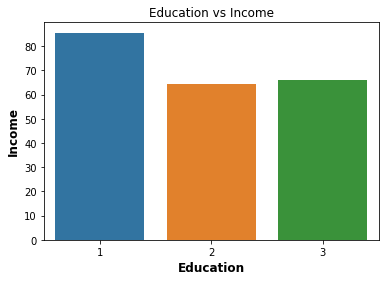

In [ ]:
df = data.groupby('Education').agg({'Income':np.average})
print(df)
sns.barplot(x= df.index, y=df['Income'], data = df)
plt.xlabel('Education',fontsize = 12, fontweight = 'bold')
plt.ylabel('Income',fontsize = 12, fontweight = 'bold')
plt.title('Education vs Income')
plt.show()

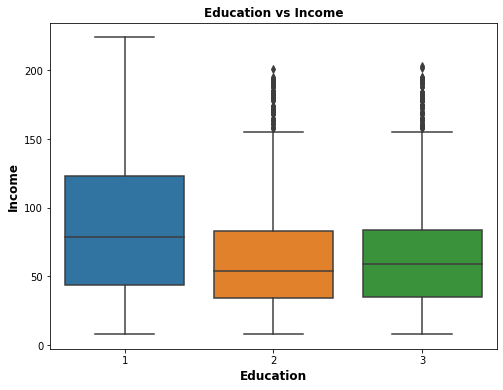

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'Education', y='Income',data = data)
plt.xlabel('Education',fontsize = 12, fontweight = 'bold')
plt.ylabel('Income',fontsize = 12, fontweight = 'bold')
plt.title('Education vs Income',fontsize = 12, fontweight = 'bold')
plt.show()


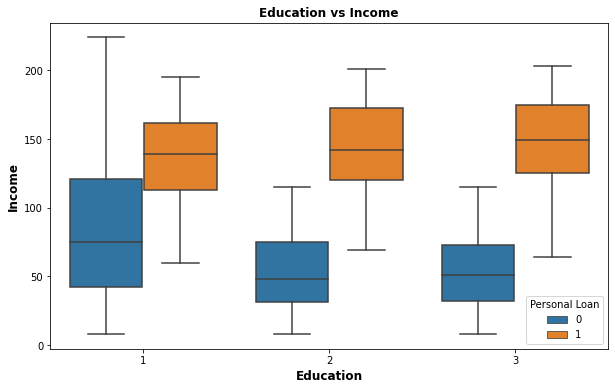

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Education', y='Income',hue = 'Personal Loan',data = data)
plt.xlabel('Education',fontsize = 12, fontweight = 'bold')
plt.ylabel('Income',fontsize = 12, fontweight = 'bold')
plt.title('Education vs Income',fontsize = 12, fontweight = 'bold')
plt.show()

**Observation:**
* The average income for Undergraduate customers is 85.58 dollars, where as the average income for Graduates and Advanced/Professional customers are 64.31 and 66.12 dollars respectively.
* There are some outliers values present in the Education:2 and Education:3 boxplots
* Customers who accepts Personal Loans have high Income.
* Most of the customers who accept the personal loan and having high income lie in the category of most educated customers as comapred to others.
* This boxplot shows that none of them have outliers.


**Inferences:**
* UnderGraduates customers are having more average income than Graduates and Adcanced/Professional customers.
* Finally,there is no outliers.

**Family vs Income**
* What is average income based on the family size?
* Which family size has the highest income?
* Are the family with highest income accept the personal loans.

In [ ]:
df_ = data.groupby('Family').agg({'Income':np.average})
print(df_)

           Income
Family           
1       78.622283
2       84.239198
3       66.904950
4       62.513093


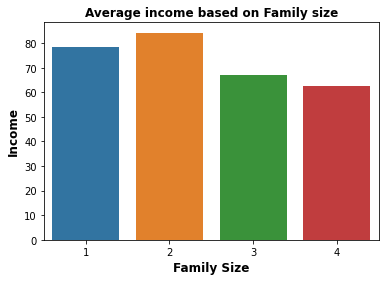

In [ ]:
sns.barplot(x = df_.index, y= 'Income', data = df_)
plt.xlabel('Family Size',fontsize = 12, fontweight = 'bold')
plt.ylabel('Income',fontsize = 12, fontweight = 'bold')
plt.title('Average income based on Family size',fontsize = 12, fontweight = 'bold')
plt.show()


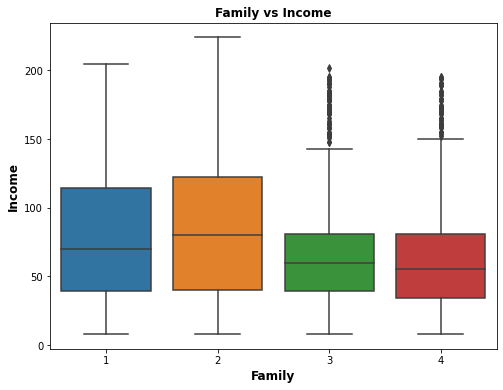

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'Family', y='Income',data = data)
plt.xlabel('Family',fontsize = 12, fontweight = 'bold')
plt.ylabel('Income',fontsize = 12, fontweight = 'bold')
plt.title('Family vs Income',fontsize = 12, fontweight = 'bold')
plt.show()

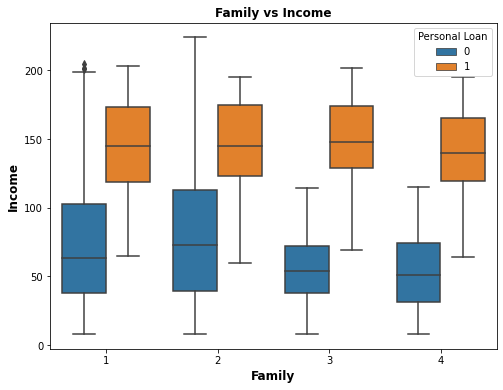

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'Family', y='Income', hue = 'Personal Loan',data = data)
plt.xlabel('Family',fontsize = 12, fontweight = 'bold')
plt.ylabel('Income',fontsize = 12, fontweight = 'bold')
plt.title('Family vs Income',fontsize = 12, fontweight = 'bold')
plt.show()

**Observation:**
* Customers with family size 2 has the highest income and customers with family size 4 has the lowest income.
* From here also it is vey clear that the customer who accepts the personal loan having high income.
* Customers with all the family size are accepting the personal loans and they are having high income.

**Securities Account vs Income**
* What is the average income based on securities account?
* The customers having securities account are having high income and are they accepting personal loans?


In [ ]:
df1_ = data.groupby('Securities Account').agg({'Income':np.average})
print(df1_)

                       Income
Securities Account           
0                   73.815319
1                   73.421456


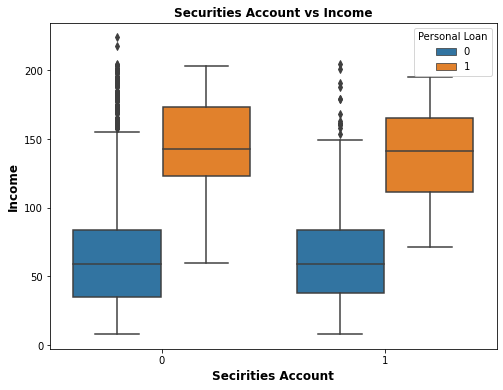

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'Securities Account', y='Income', hue = 'Personal Loan',data = data)
plt.xlabel('Secirities Account',fontsize = 12, fontweight = 'bold')
plt.ylabel('Income',fontsize = 12, fontweight = 'bold')
plt.title('Securities Account vs Income',fontsize = 12, fontweight = 'bold')
plt.show()

**Observation:**
* Customers having Securities account and not having securities account has almost same average income.
* This does not provide any important information to us whether customer are accepting the personal based on Securities account.


**CD Account vs Income**

In [ ]:
df2_ = data.groupby('CD Account').agg({'Income':np.average})
print(df2_)

                Income
CD Account            
0            71.793316
1           104.589404


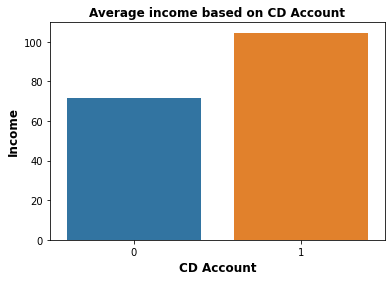

In [ ]:
sns.barplot(x = df2_.index, y= 'Income', data = df2_)
plt.xlabel('CD Account',fontsize = 12, fontweight = 'bold')
plt.ylabel('Income',fontsize = 12, fontweight = 'bold')
plt.title('Average income based on CD Account',fontsize = 12, fontweight = 'bold')
plt.show()

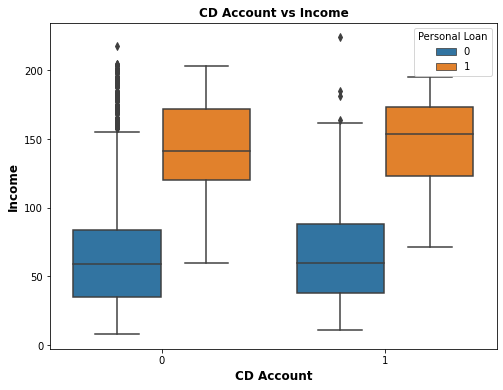

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'CD Account', y='Income', hue = 'Personal Loan',data = data)
plt.xlabel('CD Account',fontsize = 12, fontweight = 'bold')
plt.ylabel('Income',fontsize = 12, fontweight = 'bold')
plt.title('CD Account vs Income',fontsize = 12, fontweight = 'bold')
plt.show()

**Observation:**
* Customers who are having CD Account has average income more than the customer who does not having CD Account.
* It has been proved above that the customer who has CD account are more likely to acept the personal loan and having average income.


**Education vs CCAVG**
* Are the customers with high CCAvg and most educated are likely to accept the personal loan.

In [ ]:
df3_ = data.groupby('Education').agg({'CCAvg': np.average})
df3_

,CCAvg
Education,
1,2.260846
2,1.685020
3,1.723351


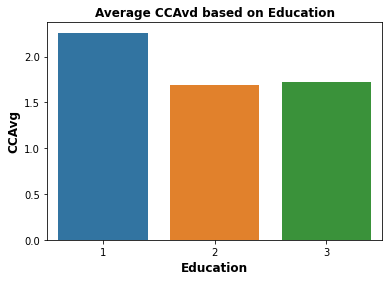

In [ ]:
sns.barplot(x = df3_.index, y= 'CCAvg', data = df3_)
plt.xlabel('Education',fontsize = 12, fontweight = 'bold')
plt.ylabel('CCAvg',fontsize = 12, fontweight = 'bold')
plt.title('Average CCAvd based on Education',fontsize = 12, fontweight = 'bold')
plt.show()

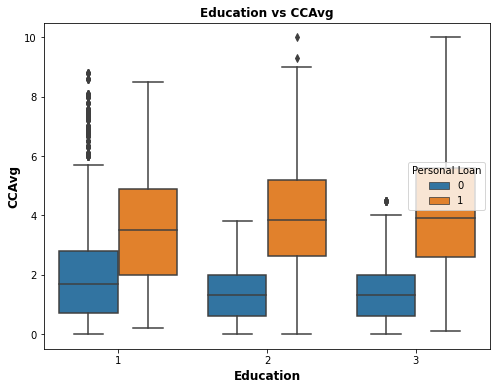

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'Education', y='CCAvg', hue = 'Personal Loan',data = data)
plt.xlabel('Education',fontsize = 12, fontweight = 'bold')
plt.ylabel('CCAvg',fontsize = 12, fontweight = 'bold')
plt.title('Education vs CCAvg',fontsize = 12, fontweight = 'bold')
plt.show()

**Observation**
* Most Undergaraduate customers are spending on their credit card.
* Customers with high CCAvg are more likely to accpet personal loan and most are Graduate and Advanced/Professional customers.

**Family Size vs CCAvg**

In [ ]:
df3_ = data.groupby('Family').agg({'CCAvg': np.average})
df3_

,CCAvg
Family,
1,2.065591
2,2.235725
3,1.700297
4,1.664662


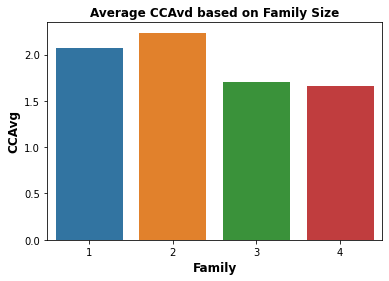

In [ ]:
sns.barplot(x = df3_.index, y= 'CCAvg', data = df3_)
plt.xlabel('Family',fontsize = 12, fontweight = 'bold')
plt.ylabel('CCAvg',fontsize = 12, fontweight = 'bold')
plt.title('Average CCAvd based on Family Size',fontsize = 12, fontweight = 'bold')
plt.show()

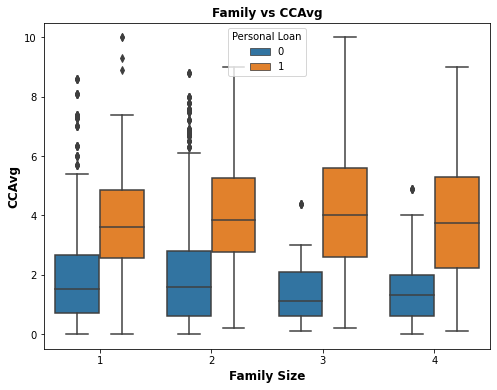

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'Family', y='CCAvg', hue = 'Personal Loan',data = data)
plt.xlabel('Family Size',fontsize = 12, fontweight = 'bold')
plt.ylabel('CCAvg',fontsize = 12, fontweight = 'bold')
plt.title('Family vs CCAvg',fontsize = 12, fontweight = 'bold')
plt.show()

**Observation:**
* Customer with family size 2 has highest CCAvg while the customers with family size 4 has the minimum CCAvg.
* Customer with family size 3 and with high CCAvg are more likey to accept the personal loan.
* Customers with family size 1 and 2 and who does not accept the personal loan consist some outliers.

## **Bivariate Analysis:** Numerical- Numerical

**Income vs Experience**
* Is Income of a customer increases with the increase of the Experience of the customer. Lets check it out by plotting a scatter plot between them.

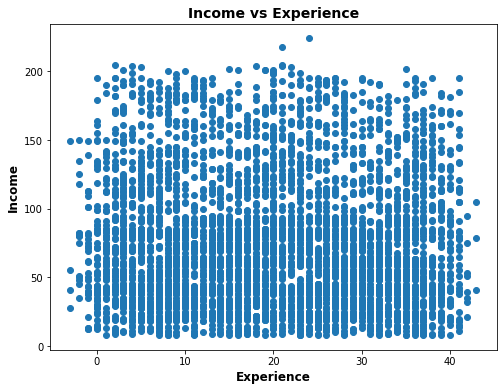

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data['Experience'], data['Income'])
plt.xlabel('Experience',fontsize = 12, fontweight = 'bold')
plt.ylabel('Income',fontsize = 12, fontweight = 'bold')
plt.title('Income vs Experience',fontsize = 14, fontweight = 'bold')
plt.show()

**Observation:**
* This looks so messy. So there is no correlation between Income and Experience features.
Let's check out for different features as well.



**Income vs CCAvg**

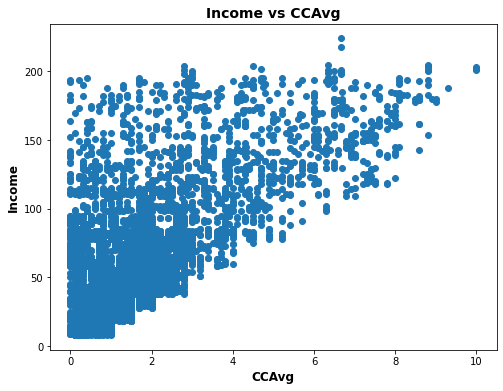

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data['CCAvg'], data['Income'])
plt.xlabel('CCAvg',fontsize = 12, fontweight = 'bold')
plt.ylabel('Income',fontsize = 12, fontweight = 'bold')
plt.title('Income vs CCAvg',fontsize = 14, fontweight = 'bold')
plt.show()

**Observation:**
* There are some values for which increase in CCAvg tends to increase in Income but not fot all. So the correlation between these two is bery less.

**Income vs Mortgage**

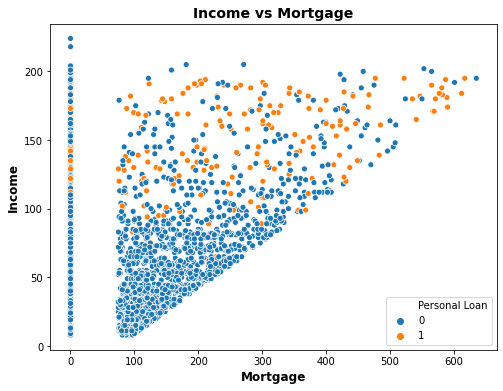

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot('Mortgage', 'Income', data= data,hue = 'Personal Loan')
plt.xlabel('Mortgage',fontsize = 12, fontweight = 'bold')
plt.ylabel('Income',fontsize = 12, fontweight = 'bold')
plt.title('Income vs Mortgage',fontsize = 14, fontweight = 'bold')
plt.show()

**Observation:**
* There are some values for which increase in Mortgage tends to increase in Income but not for all. So the correlation between these two is bery less.
* As we have seen that many of them are having mortgage value 0, thats why we are getting this vertical line at 0 value with different income values.
* Most of the customers who accepts the customer loans has high income as well as high Mortgage.

## **Multivariate Analysis**

In [ ]:
df = data[['CCAvg','Experience','Age','Income','Mortgage','Personal Loan']]
df.head()

,CCAvg,Experience,Age,Income,Mortgage,Personal Loan
0,1.6,1,25,49,0,0
1,1.5,19,45,34,0,0
2,1.0,15,39,11,0,0
3,2.7,9,35,100,0,0
4,1.0,8,35,45,0,0


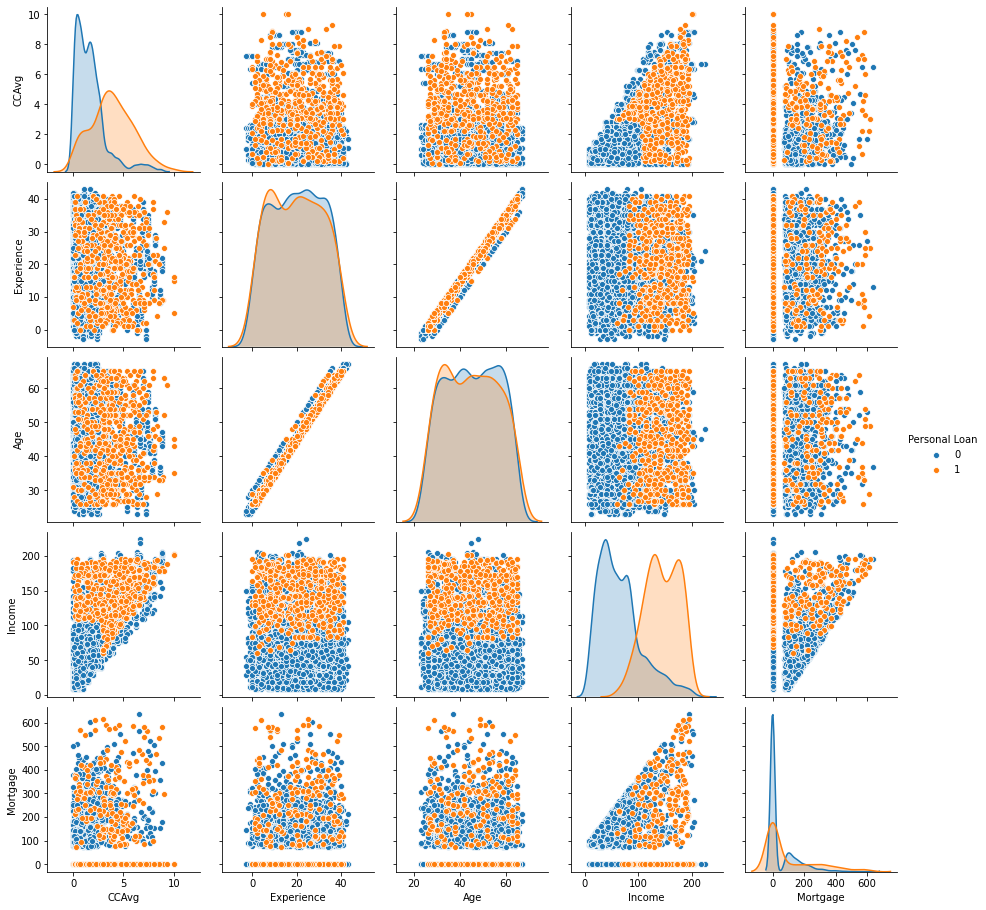

In [ ]:
sns.pairplot(df,hue = 'Personal Loan')

# **Feature Engineering**
* Before moving further in this section first let's find the correlation between the features using Heatmap.

**Finding correlation between features using Heatmap.**

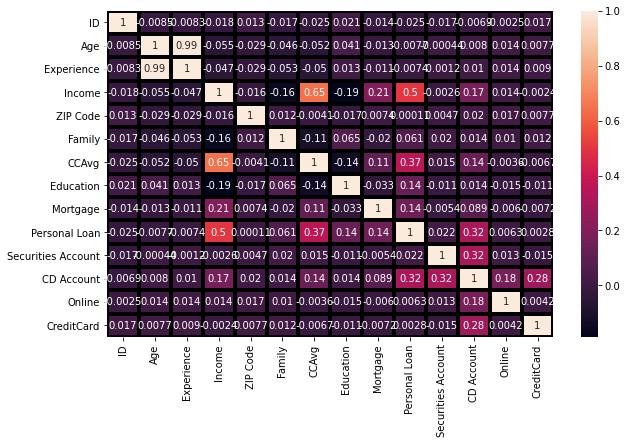

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(method = 'pearson'), annot = True, fmt = '.2g', linewidths=3, linecolor='black')

**Observation:**
* The highest correlation is between Age and experience i.e 0.99. So we can remove age feature from the data.
* Other features that are having the correlations between themselves are Income and CCAvg, Personal Loan and Income, Personal Loan and CCAvg, Securities Account and CD Account, CreditCard and CD Account, CD Account and Personal Loan.

**We can generate a new features from Income and CCAvg feature**
* Annual income of customer is given. So income of 1 month = Income/12
and CCAvg is given for one month

In [ ]:
data['Income_CCAvg'] = (data['Income']/12)*data['CCAvg']
data['Income_CCAvg'].head()

0     6.533333
1     4.250000
2     0.916667
3    22.500000
4     3.750000
Name: Income_CCAvg, dtype: float64

In [ ]:
data['Income_CCAvg1'] = (data['Income']/12)**data['CCAvg']
data['Income_CCAvg1'].head()

0      9.497816
1      4.769211
2      0.916667
3    306.344887
4      3.750000
Name: Income_CCAvg1, dtype: float64

Remove unnecessary columns which are redundant that does not contribute to the model prediction.

In [ ]:
# Removing Unecessary Columns
data.drop(columns = ['ZIP Code'], inplace = True)

In [ ]:
data.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_CCAvg,Income_CCAvg1
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0,6.533333,9.497816
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0,4.250000,4.769211
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0,0.916667,0.916667
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0,22.500000,306.344887
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1,3.750000,3.750000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Income_CCAvg        5000 non-null   float64
 14  Income_CCAvg1       5000 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 586.1 KB


**Since there is no features whose datatype is object or bool. So there is no need to convert features into numeric datatype.**

## **Feature Scaling**
Now lets scale the features whose values are varying very much.
Appling the feature scaling in columns Age, Experience, Income, CCAvg, Mortgage, Income_CCAvg and Income_CCAvg1.

In [ ]:
from sklearn.preprocessing import StandardScaler

column_scale = ['Age','Experience','Income','CCAvg','Mortgage','Income_CCAvg','Income_CCAvg1']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[column_scale])
scaled_features = pd.DataFrame(scaled_features,columns=column_scale)
#scaled_features.head()
#scaled_features.tail()
data = data.drop(columns = column_scale,axis =1)
data = scaled_features.join(data)
data.head()

,Age,Experience,Income,CCAvg,Mortgage,Income_CCAvg,Income_CCAvg1,ID,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-1.666078,-0.538229,-0.193371,-0.555524,-0.404187,-0.028303,1,4,1,0,1,0,0,0
1,-0.029524,-0.096330,-0.864109,-0.250595,-0.555524,-0.499226,-0.028303,2,3,1,0,1,0,0,0
2,-0.552992,-0.445163,-1.363793,-0.536720,-0.555524,-0.637968,-0.028303,3,1,1,0,0,0,0,0
3,-0.901970,-0.968413,0.569765,0.436103,-0.555524,0.260389,-0.028303,4,1,2,0,0,0,0,0
4,-0.901970,-1.055621,-0.625130,-0.536720,-0.555524,-0.520037,-0.028303,5,4,2,0,0,0,0,1


**Now separate the target(dependent feature) from the indpendent features which is useful for buliding the predictive model.** But before this set index as ID feature.


In [ ]:
# Set index as ID feature.
data = data.set_index('ID')
data.head()

,Age,Experience,Income,CCAvg,Mortgage,Income_CCAvg,Income_CCAvg1,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,,
1,-1.774417,-1.666078,-0.538229,-0.193371,-0.555524,-0.404187,-0.028303,4,1,0,1,0,0,0
2,-0.029524,-0.096330,-0.864109,-0.250595,-0.555524,-0.499226,-0.028303,3,1,0,1,0,0,0
3,-0.552992,-0.445163,-1.363793,-0.536720,-0.555524,-0.637968,-0.028303,1,1,0,0,0,0,0
4,-0.901970,-0.968413,0.569765,0.436103,-0.555524,0.260389,-0.028303,1,2,0,0,0,0,0
5,-0.901970,-1.055621,-0.625130,-0.536720,-0.555524,-0.520037,-0.028303,4,2,0,0,0,0,1


In [ ]:
# Now searate the independt and dependent feature.
X = data.drop(columns='Personal Loan',axis = 1)
Y = data['Personal Loan']

**Now seaprate the train and test data set by using train test split. This test dataset is used to evaluate the model performance.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## **Modelling Phase: Model Building**

## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred_dt = dt_clf.predict(X_test)
y_predict_probability = dt_clf.fit(X_train,y_train).predict_proba(X_test.values)
y_proba = list(zip(y_test, y_predict_probability))



In [ ]:
train_score = dt_clf.score(X_train,y_train)
test_score = dt_clf.score(X_test,y_test)
acc_score = accuracy_score(y_pred_dt,y_test)
auc_score = roc_auc_score(y_pred_dt,y_test)
f1_score = f1_score(y_pred_dt,y_test)
print('Training Score: ', train_score)
print('Test score: ', test_score)
print('Accuracy Score: ', acc_score)
print('Roc Auc Score: ', auc_score)
print('F1 Score: ',f1_score)

Training Score:  1.0
Test score:  0.982
Accuracy Score:  0.983
Roc Auc Score:  0.9501165529915268
F1 Score:  0.9050279329608939


**Since we know that it is an imbalanced dataset. So we need to evaluate our model on F1 score. And to handle the imbalanced dataset we need to do Sampling.
Now we have three techniques to do Sampling or to handle imbalanced dataset.**
1. **Undersampling** : We can do undersampling but since we have only 5000 training points so, if we do undersampling there is high chance of loosing inforamtion.
2. **Oversampling**: In this case we can do oversampling. We can do oversampling in a way such that both the classes will have equal data points by duplicating the records with some randomness.
3. **Third technique** to handle imbalanced dataset is to hypertune the class weight parameters in some of the Boosting Classifiers.

But our task is to build a Decision Tree model so we are choosing the 2nd method to handle imbalanced dataset.

In [ ]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler

print('The dimension of X_train before sampling:', X_train.shape)
print('The dimension of y_train before sampling:', y_train.shape)

oversampler = RandomOverSampler(sampling_strategy = 'minority')

# fit and apply the transform.
X_train_sampled,y_train_sampled = oversampler.fit_resample(X_train,y_train)

print('The dimension of X_train before sampling:', X_train_sampled.shape)
print('The dimension of y_train before sampling:', y_train_sampled.shape)
print('The total number of values each class have\n')
print(pd.Series(y_train_sampled).value_counts())


The dimension of X_train before sampling: (4000, 13)
The dimension of y_train before sampling: (4000,)
The dimension of X_train before sampling: (7220, 13)
The dimension of y_train before sampling: (7220,)
The total number of values each class have

1    3610
0    3610
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**Observation:**
* Now each class have a equal number of classes. Hence the dataset is balanced.

## **Decision tree model with balanced dataset**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_sampled,y_train_sampled)
y_pred_dt = dt_clf.predict(X_test)
y_predict_probability = dt_clf.predict_proba(X_test)

## **Model Evaluation**

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred_dt)
classi_report = classification_report(y_test,y_pred_dt)
train_score = dt_clf.score(X_train_sampled,y_train_sampled)
test_score = dt_clf.score(X_test,y_test)
acc_score = accuracy_score(y_test,y_pred_dt)
auc_score = roc_auc_score(y_test,y_pred_dt)
f1_score = f1_score(y_test,y_pred_dt)
print('Confusion Matrix\n', conf_matrix)
print('Classification Report\n', classi_report)
print('Training Score: ', train_score)
print('Test score: ', test_score)
print('Accuracy Score: ', acc_score)
print('Roc Auc Score: ', auc_score)
print('F1 Score: ',f1_score)

Confusion Matrix
 [[904   6]
 [  8  82]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.93      0.91      0.92        90

    accuracy                           0.99      1000
   macro avg       0.96      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000

Training Score:  1.0
Test score:  0.986
Accuracy Score:  0.986
Roc Auc Score:  0.9522588522588522
F1 Score:  0.9213483146067416


**Observation:**
* The f1_score of classifying the 0 class is almost 100% where the classifying 1 class is 90%. 

## **Important Features**

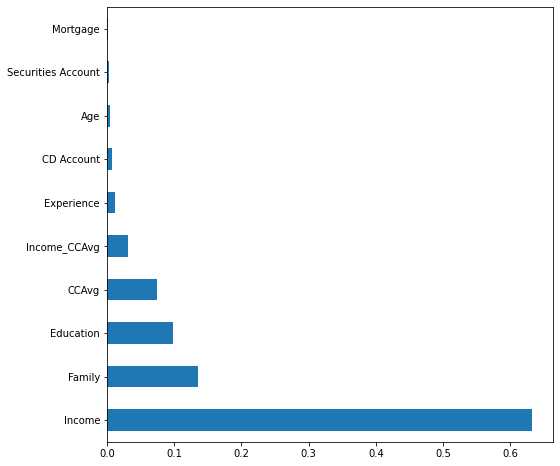

In [ ]:
feat_importances = pd.Series(dt_clf.feature_importances_, index= X.columns)
plt.figure(figsize=(8,8))
feat_importances.nlargest(10).plot(kind='barh')

**The 10 most important features are Income, Family,Education, CCAvg, Income_CCAvg, Experience, CD Account, Age etc . to predict whether the customer accepts the personal loan or not.**

### **Hypertuning the model parameter using Grid Search Cv.**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[4,6,8,10,12], 'splitter':['best','random'], 'min_samples_leaf':[8,10,12]}
dt_clf = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(estimator=dt_clf, param_grid = parameters, cv = 3, n_jobs=-1)
grid.fit(X_train_sampled, y_train_sampled)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)
print("\n ========================================================")


 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

 The best score across ALL searched params:
 0.9840726163173058

 The best parameters across ALL searched params:
 {'max_depth': 12, 'min_samples_leaf': 8, 'splitter': 'best'}



**Observation:**
* The best parameter to of the model is {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 10, 'splitter': 'best'}

Let's now build our model on best parameters

# Final Model

In [ ]:
def model(X_train_sampled,y_train_sampled,X_test,y_test):
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score, f1_score
  from sklearn.metrics import confusion_matrix, classification_report

  dt_clf = DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=12, random_state=67)
  dt_clf.fit(X_train_sampled,y_train_sampled)
  y_pred_dt = dt_clf.predict(X_test)
  y_predict_proba = dt_clf.predict_proba(X_test)
  y_proba_list = list(zip(y_test[:],y_predict_proba[:,1]))

  # Model Evaluation
  conf_matrix = confusion_matrix(y_test,y_pred_dt)
  classi_report = classification_report(y_test,y_pred_dt)
  train_score = dt_clf.score(X_train_sampled,y_train_sampled)
  test_score = dt_clf.score(X_test,y_test)
  acc_score = accuracy_score(y_test,y_pred_dt)
  auc_score = roc_auc_score(y_test,y_pred_dt)
  f1_score = f1_score(y_test,y_pred_dt)
  print('Confusion Matrix\n', conf_matrix)
  print('Classification Report\n', classi_report)
  print('Training Score: ', train_score)
  print('Test score: ', test_score)
  print('Accuracy Score: ', acc_score)
  print('Roc Auc Score: ', auc_score)
  print('F1 Score: ',f1_score)   

  return dt_clf,y_proba_list

In [ ]:
model(X_train_sampled,y_train_sampled,X_test,y_test)

Confusion Matrix
 [[905   5]
 [  8  82]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.94      0.91      0.93        90

    accuracy                           0.99      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000

Training Score:  0.999584487534626
Test score:  0.987
Accuracy Score:  0.987
Roc Auc Score:  0.9528083028083028
F1 Score:  0.9265536723163842


(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=12, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=67, splitter='best'),
 [(0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (1, 1.0),
  (1, 1.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (1, 1.0),
  (0, 0.0),
  (0, 0.0),
  (1, 1.0),
  (0, 1.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (0, 0.0),
  (1, 

**Since oure Task 1 is to Build a model that will help to identify the potential customers who have a higher probability of purchasing the loan. Through this we can a get probability for purchasing the loan for different customers.**

**Our 2nd task is to Use a classification model to predict the likelihood of a liability customer buying personal loans.**

In [ ]:
def task2():
   dt_clf = DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=12, random_state=67)
   dt_clf.fit(X_train_sampled,y_train_sampled)
   y_predict_proba = dt_clf.predict_proba(X_test)
   y_proba_list = list(zip(y_test,y_predict_proba))
   return y_proba_list
task2()


[(0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (1, array([0., 1.])),
 (1, array([0., 1.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (1, array([0., 1.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (1, array([0., 1.])),
 (0, array([0., 1.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array([1., 0.])),
 (0, array(

**Task -3rd Build a decision tree model to identify probability of purchasing loan.**

In [ ]:
def task3():
  model(X_train_sampled,y_train_sampled,X_test,y_test)
  return y_predict_probability
task3()

Confusion Matrix
 [[905   5]
 [  8  82]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.94      0.91      0.93        90

    accuracy                           0.99      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000

Training Score:  0.999584487534626
Test score:  0.987
Accuracy Score:  0.987
Roc Auc Score:  0.9528083028083028
F1 Score:  0.9265536723163842


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## **Thank You!**